# Feature Selection Filter Methods

## Dataset Overview

The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).


Attribute Information: -- Only 14 used

1. #3 (age) Age in years.
2. #4 (sex) Biological sex (1 = male; 0 = female).
3. #9 (cp) (Chest pain type: typical, atypical, non-anginal, or asymptomatic).
4. #10 (trestbps) (Resting blood pressure: Systolic/Diastolic).
5. #12 (chol) (Serum cholesterol).
6. #16 (fbs) (Blood sugar and diabetes status)
7. #19 (restecg) (Resting results, including hypertrophy or ST-T wave abnormalities).
8. #32 (thalach) Heart rate (thalach - max achieved, thalrest - resting).
9. #38 (exang) Exercise-induced angina (1 = yes; 0 = no).
10. #40 (oldpeak) (ST depression and segment slope).
11. #41 (slope) (ST depression and segment slope).
12. #44 (ca) (Number of major vessels colored by fluoroscopy).
13. #51 (thal) (Thallium stress test results).
14. #58 (num) (The Target): num (Diagnosis of heart disease.
- 0 = <50% narrowing/No disease;
- 1: > 50% diameter narrowing (Presence of disease)

https://www.openml.org/search?type=data&sort=runs&status=active&qualities.NumberOfClasses=lte_1&id=204

## Imports Libraries

In [1]:
import pandas as pd
import numpy as np
from scipy.io import arff
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.decomposition import PCA
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Load Dataset

In [29]:
# While pandas does not have a built-in read_arff()
# function, you can read an ARFF file into a pandas
# DataFrame using external libraries such as SciPy or liac-arff.

PATH_CVS ='/home/ramses2099/Sources/IAProject/machine_learning/data/dataset_2190_cholesterol.arff'

# Load the ARFF file
# loadarff returns a tuple: the first element is the data, the second is the metadata
arff_file = arff.loadarff(PATH_CVS)

# Convert the data part of the result into a pandas DataFrame
df = pd.DataFrame(arff_file[0])

TARGET_COLMN ='num'

## Step 1 Data Overview and Initial Analysis

In [30]:
print("Initial Data Set: ", df.shape)
display("Feature Overview: ",df.head())

Initial Data Set:  (303, 14)


'Feature Overview: '

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,chol
0,63.0,b'1',b'1',145.0,b'1',b'2',150.0,b'0',2.3,b'3',0.0,b'6',0.0,233.0
1,67.0,b'1',b'4',160.0,b'0',b'2',108.0,b'1',1.5,b'2',3.0,b'3',2.0,286.0
2,67.0,b'1',b'4',120.0,b'0',b'2',129.0,b'1',2.6,b'2',2.0,b'7',1.0,229.0
3,37.0,b'1',b'3',130.0,b'0',b'0',187.0,b'0',3.5,b'3',0.0,b'3',0.0,250.0
4,41.0,b'0',b'2',130.0,b'0',b'2',172.0,b'0',1.4,b'1',0.0,b'3',0.0,204.0


In [31]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        0
num         0
chol        0
dtype: int64

In [32]:
df.describe(include='all')

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,chol
count,303.000000,303,303,303.000000,303,303,303.000000,303,303.000000,303,299.000000,303,303.000000,303.000000
unique,NaN,2,4,NaN,2,3,NaN,2,NaN,3,NaN,4,NaN,NaN
top,NaN,b'1',b'4',NaN,b'0',b'0',NaN,b'0',NaN,b'1',NaN,b'3',NaN,NaN
freq,NaN,206,144,NaN,258,151,NaN,204,NaN,142,NaN,166,NaN,NaN
mean,54.438944,NaN,NaN,131.689769,NaN,NaN,149.607261,NaN,1.039604,NaN,0.672241,NaN,0.937294,246.693069
std,9.038662,NaN,NaN,17.599748,NaN,NaN,22.875003,NaN,1.161075,NaN,0.937438,NaN,1.228536,51.776918
min,29.000000,NaN,NaN,94.000000,NaN,NaN,71.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,126.000000
25%,48.000000,NaN,NaN,120.000000,NaN,NaN,133.500000,NaN,0.000000,NaN,0.000000,NaN,0.000000,211.000000
50%,56.000000,NaN,NaN,130.000000,NaN,NaN,153.000000,NaN,0.800000,NaN,0.000000,NaN,0.000000,241.000000
75%,61.000000,NaN,NaN,140.000000,NaN,NaN,166.000000,NaN,1.600000,NaN,1.000000,NaN,2.000000,275.000000


In [33]:
# Set target column
CAT_COLUMNS = df.select_dtypes(include='object').columns.to_list()
NUM_COLUMNS = df.select_dtypes(exclude='object').columns.to_list()

print(f"Categorical Columns: {CAT_COLUMNS}")
print(f"Numerical Columns: {NUM_COLUMNS}")

# Label Encoding
mapping = { b'0':0, b'1':1, b'2':2, b'3':3,  b'4':4, b'6':6, b'7':7, b'?':5 }
# print(mapping)

for col in CAT_COLUMNS:
   df[col] = df[col].map(mapping)

# Replace 4 row with null value in column ca
df[df['ca'].isnull()] = 0

Categorical Columns: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
Numerical Columns: ['age', 'trestbps', 'thalach', 'oldpeak', 'ca', 'num', 'chol']


In [34]:
print("Missing Values:")
df.isnull().sum()

Missing Values:


age         0
sex         0
cp          0
trestbps    0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
chol        0
dtype: int64

## FILTER METHODS

### Correlation coefficients, Correlation Matrix

A correclation matrix show the relationship (linear dependence) between numerical features. Features with the high correlation (near 1 or -1) are considered strongly related, and one may be exluded to reduce multicollinearity.

We'll use Pearson correlation by default (which assumes a linear relationship between features). correlation coefficient varies between -1 and 1

- 1 means a perfect positive correlation
- -1 means a perfect negative correlation
- 0 means no linear correlation

## Numerical **Pearson Correlation**

,age,trestbps,thalach,oldpeak,ca,num,chol
age,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trestbps,0.552630,NaN,NaN,NaN,NaN,NaN,NaN
thalach,0.084813,0.360787,NaN,NaN,NaN,NaN,NaN
oldpeak,0.220238,0.212068,-0.209547,NaN,NaN,NaN,NaN
ca,0.343624,0.128270,-0.161390,0.301757,NaN,NaN,NaN
num,0.231175,0.177684,-0.276704,0.506333,0.522383,NaN,NaN
chol,0.420786,0.400536,0.289685,0.084974,0.143530,0.099363,NaN


Time Taken: 0.00 seconds


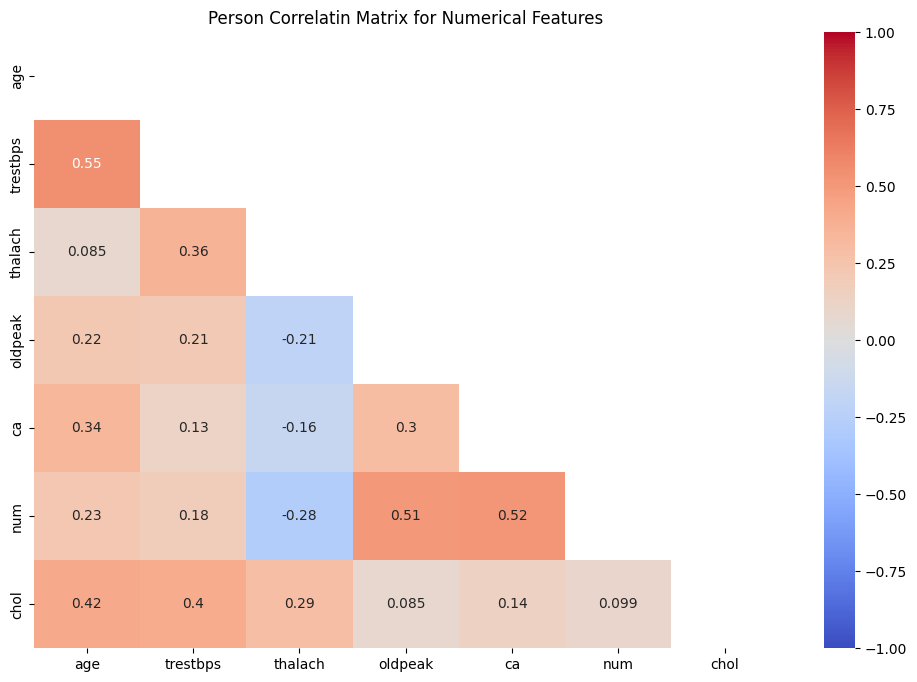

In [35]:
import time

start_t = time.time()
# Colculate correlatin matrix for numerical features
corr_matrix = df[NUM_COLUMNS].corr(method='pearson')
corr_matrix = corr_matrix.mask(np.triu(np.ones_like(corr_matrix, dtype=bool)))
end_t = time.time()
display(corr_matrix)
print(f"Time Taken: {end_t - start_t:.2f} seconds")

# Plot
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Person Correlatin Matrix for Numerical Features')
plt.show()

## Nuermical **Spearman Correlation**

Measures monotonic relationships (captures both linear and no-linear monotonic relationships)

,age,trestbps,thalach,oldpeak,ca,num,chol
age,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trestbps,0.327338,NaN,NaN,NaN,NaN,NaN,NaN
thalach,-0.335329,-0.004404,NaN,NaN,NaN,NaN,NaN
oldpeak,0.272743,0.177997,-0.389604,NaN,NaN,NaN,NaN
ca,0.392274,0.095329,-0.260117,0.274746,NaN,NaN,NaN
num,0.255352,0.156088,-0.411072,0.467771,0.534019,NaN,NaN
chol,0.217448,0.173827,0.009070,0.052364,0.153892,0.11945,NaN


Time Taken: 0.00 seconds


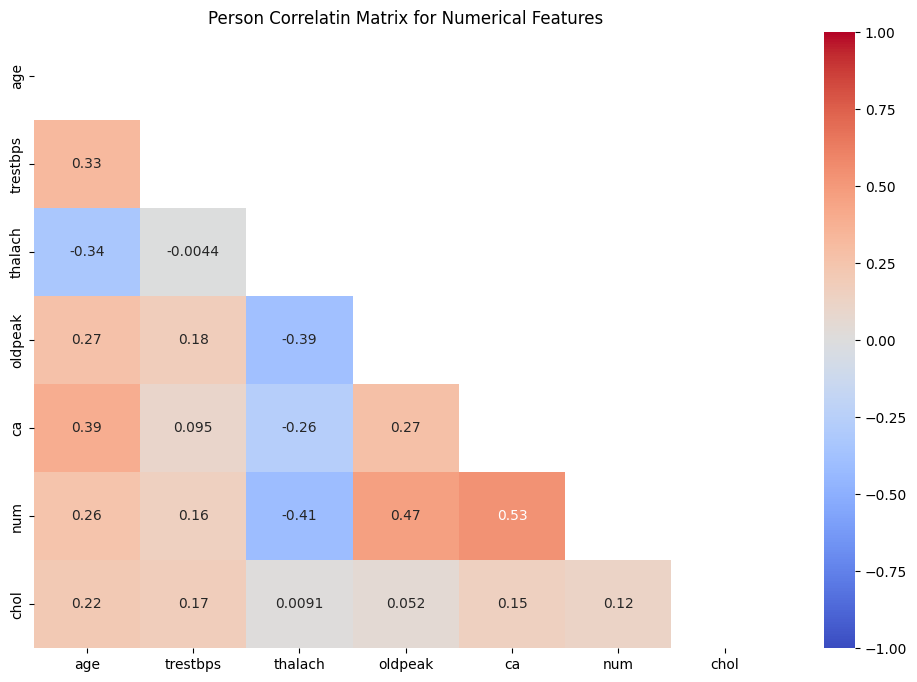

In [36]:
import time

start_t = time.time()
# Colculate correlatin matrix for numerical features
corr_matrix = df[NUM_COLUMNS].corr(method='spearman')
corr_matrix = corr_matrix.mask(np.triu(np.ones_like(corr_matrix, dtype=bool)))
end_t = time.time()
display(corr_matrix)
print(f"Time Taken: {end_t - start_t:.2f} seconds")

# Plot
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Person Correlatin Matrix for Numerical Features')
plt.show()

## Numerical **Kendall Correlation** Correlation

Measures ordinal association between two variables, capturing monotonic relationships

,age,trestbps,thalach,oldpeak,ca,num,chol
age,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trestbps,0.233417,NaN,NaN,NaN,NaN,NaN,NaN
thalach,-0.240440,-0.003914,NaN,NaN,NaN,NaN,NaN
oldpeak,0.196684,0.127432,-0.276625,NaN,NaN,NaN,NaN
ca,0.314190,0.075560,-0.201651,0.224507,NaN,NaN,NaN
num,0.198276,0.121985,-0.318548,0.377763,0.480172,NaN,NaN
chol,0.151356,0.120288,0.005646,0.039858,0.121850,0.093714,NaN


Time Taken: 0.01 seconds


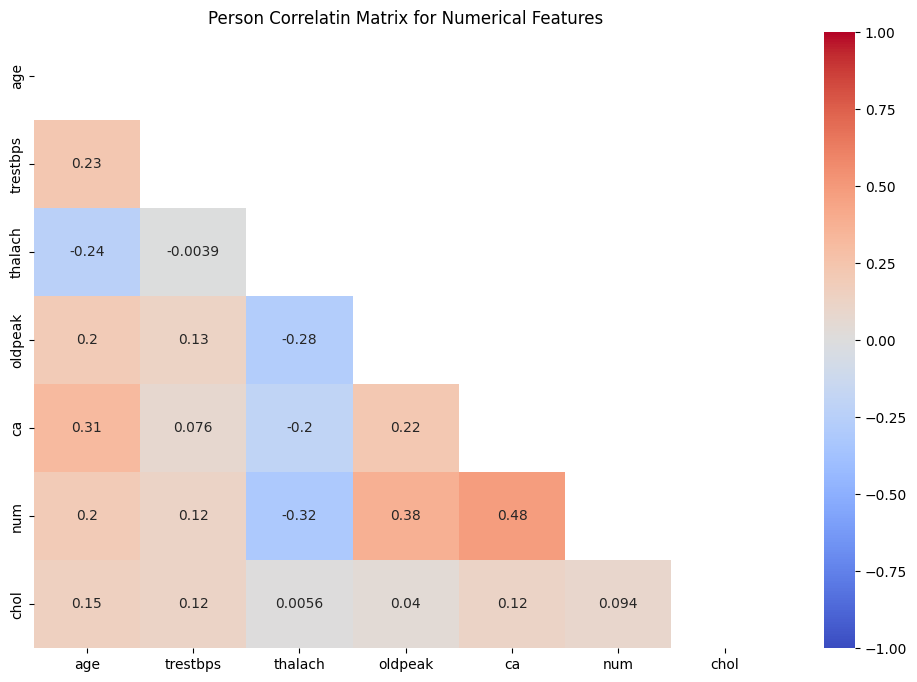

In [37]:
import time

start_t = time.time()
# Colculate correlatin matrix for numerical features
corr_matrix = df[NUM_COLUMNS].corr(method='kendall')
corr_matrix = corr_matrix.mask(np.triu(np.ones_like(corr_matrix, dtype=bool)))
end_t = time.time()
display(corr_matrix)
print(f"Time Taken: {end_t - start_t:.2f} seconds")

# Plot
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Person Correlatin Matrix for Numerical Features')
plt.show()

## Categorical - Categorican Cramer's V

Use Cramer's V to assess correlations between **categorical features**

In [44]:
from scipy.stats import chi2_contingency

def cramer_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2, _ ,_ ,_ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    r, k = contingency_table.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Example: calculate Cramer's_v
for i, col1 in enumerate(CAT_COLUMNS):
    for col2 in CAT_COLUMNS[i+1:]:
        cramers_v_val = cramer_v(df[col1], df[col2])
        print(f"Cramers V between {col1} and {col2}: {cramers_v_val:.4f}")

# df[CAT_COLUMNS].head()

Cramers V between sex and cp: 0.2252
Cramers V between sex and fbs: 0.0431
Cramers V between sex and restecg: 0.1116
Cramers V between sex and exang: 0.1522
Cramers V between sex and slope: 0.1713
Cramers V between sex and thal: 0.4199
Cramers V between cp and fbs: 0.1334
Cramers V between cp and restecg: 0.1438
Cramers V between cp and exang: 0.4662
Cramers V between cp and slope: 0.6028
Cramers V between cp and thal: 0.5327
Cramers V between fbs and restecg: 0.0794
Cramers V between fbs and exang: 0.0054
Cramers V between fbs and slope: 0.1187
Cramers V between fbs and thal: 0.1418
Cramers V between restecg and exang: 0.0933
Cramers V between restecg and slope: 0.1513
Cramers V between restecg and thal: 0.1099
Cramers V between exang and slope: 0.2945
Cramers V between exang and thal: 0.3357
Cramers V between slope and thal: 0.6086


## Mutual Information

Mutual Information quantifies the amount of information gained about the target from knowing the feature values. it work well for both numerical and categorical features and is usegul for non-linear relationships.

Higher MI values mean the feature provides more information about the target, which suggests it could be more important for predictive tasks. However **MI is not bounded between -1 abd 1** like correlation and works well for detecting non-linear relationships.

In [45]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(df[NUM_COLUMNS], df[TARGET_COLMN])

for i, col in enumerate(NUM_COLUMNS):
    print(f"Mutual Informatin between {col} and target: {mutual_info[i]:.4f}")

Mutual Informatin between age and target: 0.0158
Mutual Informatin between trestbps and target: 0.0045
Mutual Informatin between thalach and target: 0.0669
Mutual Informatin between oldpeak and target: 0.1097
Mutual Informatin between ca and target: 0.1456
Mutual Informatin between num and target: 1.2825
Mutual Informatin between chol and target: 0.0458


## Weight Of Evidence, WoE

Interpretation of WoE:
- Positive WoE indicates that a category is associated with a higher liklihood of the target event (in this cas num)
- Negative Woe sugests that a category is associated with a lower likelihood of the target event
- A WoE evalue of 0 means that the category does not provide any predictive power.

Interpretatin of IV:
- IV < 0.02: Not Predictive
- 0.02 - 0.1: Weak Predictor
- 0.1 - 0.3: Medium Predictor
- 0.3 - 0.5: Strong Predictor
- IV > 0.5: Very Strong Predictor (Possible overfitting or data leakage)

In [46]:
# function calculate WoE and Inforamtion Value
def cal_woe_iv(df, feature, target):
    crosstab = pd.crosstab(df[feature], df[TARGET_COLMN], dropna=False).astype(float)
    
    crosstab['total'] = crosstab[0] + crosstab[1]
    
    crosstab['event_rate'] = crosstab[1] / crosstab[1].sum()
    crosstab['non_event_rate'] = crosstab[0] / crosstab[0].sum()
    
    crosstab['woe'] = np.log((crosstab['event_rate'] + 1e-10) / (crosstab['non_event_rate'] + 1e-10))
    
    crosstab['iv'] = (crosstab['event_rate'] - crosstab['non_event_rate']) * crosstab['woe']
    iv = crosstab['iv'].sum()
    
    return crosstab[['event_rate','non_event_rate','woe', 'iv']], iv


woe_ca, iv_ca = cal_woe_iv(df, 'ca', TARGET_COLMN)
print("Woe for education: ", woe_ca)
print('Information Value (IV) for ca: {:.4f}'.format(iv_ca)) 
    
    

Woe for education:  num  event_rate  non_event_rate       woe        iv
ca                                                 
0.0    0.481481        0.812121 -0.522782  0.172852
1.0    0.351852        0.127273  1.016878  0.228370
2.0    0.111111        0.042424  0.962811  0.066132
3.0    0.055556        0.018182  1.116961  0.041745
Information Value (IV) for ca: 0.5091


## ANOVA - Analysis of Variance

The ANova F-statistic test whether the means of a numerical feature significatly differ between two groups.

- **F-Statistic:**

A high F-statistic indicates that there is a significant difference in the mean value of the feature across the groups, implygin that the feature may have predictive power in determining the target variable. A low F-statistic suggests no suggests no signficant difference in means, implying the feature might not be useful for prediction.

- **p-value:**

If the p-value is less than 0.05, it means the feature has a significant effect on the target. i,.e, the means of the groups are significantly different. A high p-value (e,g., > 0.05) means there is no signifivant difference between the means for the groups, implygin the feature might not be relevant for predicting the target.

In [48]:
from sklearn.feature_selection import f_classif

f_stat, p_values = f_classif(df[NUM_COLUMNS], df[TARGET_COLMN])
for i, col in enumerate(NUM_COLUMNS):
    print(f"ANOVA F-statistic for {col}: {f_stat[i]:.4f}, p-value: {p_values[i]:.4f}")
    
dtype =[('feature','U50'),('score','f8')]
feature_scores = np.array(list(zip(NUM_COLUMNS, f_stat)), dtype=dtype)

feature_scores = np.sort(feature_scores, order='score')[::-1]

print("\nSorted featrues by ANOVA F-statistic:")
print(f"{'Feature Name':<30}{'F-Statistic Score':>10}")

for row in feature_scores:
    print(f"{row['feature']:<30}{row['score']:>20.4f}")

ANOVA F-statistic for age: 5.3612, p-value: 0.0004
ANOVA F-statistic for trestbps: 2.7919, p-value: 0.0266
ANOVA F-statistic for thalach: 7.4228, p-value: 0.0000
ANOVA F-statistic for oldpeak: 26.5153, p-value: 0.0000
ANOVA F-statistic for ca: 28.7131, p-value: 0.0000
ANOVA F-statistic for num: inf, p-value: 0.0000
ANOVA F-statistic for chol: 1.3302, p-value: 0.2587

Sorted featrues by ANOVA F-statistic:
Feature Name                  F-Statistic Score
num                                            inf
ca                                         28.7131
oldpeak                                    26.5153
thalach                                     7.4228
age                                         5.3612
trestbps                                    2.7919
chol                                        1.3302


## Chi-Square Test

The Chi-Square Test measures the statistical significance of the association between each categorical feature and the target variable.

**The higher the Chi-Square score, the stronger the association between the feature and the target**

However, there's no absolute threshold for the Chi-Square score itself because the meaninfulness of the score depends on the number of observations and categories in the feature.

In [52]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2

# Encode Categorical feature:
# df_encoded = df[CAT_COLUMNS].apply(LabelEncoder().fit_transform())

# Chi-square test for association with target
chi_scores, p_values = chi2(df[CAT_COLUMNS], df[TARGET_COLMN])
for i, col in enumerate(CAT_COLUMNS):
    print(f"Chi-square score for {col}: {chi_scores[i]:.4f}, p-value: {p_values[i]:.4f}")

dtype =[('feature','U50'),('score', 'f8')]
feature_scores = np.array(list(zip(CAT_COLUMNS, chi_scores)),dtype=dtype)

features_scores = np.sort(feature_scores, order='score')[::-1]

print("\nSorted features by Chi-square score")
print(f"{'Feature Name':<30}{'Chi-square Score':>20}")

for row in features_scores:
    print(f"{row['feature']:<30}{row['score']:>20.4f}")

Chi-square score for sex: 8.8623, p-value: 0.0646
Chi-square score for cp: 19.6565, p-value: 0.0006
Chi-square score for fbs: 7.8421, p-value: 0.0975
Chi-square score for restecg: 14.1174, p-value: 0.0069
Chi-square score for exang: 41.7531, p-value: 0.0000
Chi-square score for slope: 12.0335, p-value: 0.0171
Chi-square score for thal: 77.8270, p-value: 0.0000

Sorted features by Chi-square score
Feature Name                      Chi-square Score
thal                                       77.8270
exang                                      41.7531
cp                                         19.6565
restecg                                    14.1174
slope                                      12.0335
sex                                         8.8623
fbs                                         7.8421


The same happeins if we use SelectKBest with score_func=chi2

In [54]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder

# Note I apply Target encode
# Encode Categorical feature:
# df_encoded = df[CAT_COLUMNS].apply(LabelEncoder().fit_transform())

k = 5
selector = SelectKBest(score_func=chi2, k=k)
selector.fit(df[CAT_COLUMNS], df[TARGET_COLMN])

selected_feature = [col for col, is_selected in zip(CAT_COLUMNS, selector.get_support()) if is_selected]
print("Top ", k, "selected categorical features based on Chi-Square scores:", selected_feature)


Top  5 selected categorical features based on Chi-Square scores: ['cp', 'restecg', 'exang', 'slope', 'thal']
